In [95]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib
#matplotlib.use('pgf')
import matplotlib.pyplot as plt


In [96]:
# Load all JSON files from experimentation_results into a DataFrame
def load_all_experimentation_results(folder_path):
    all_data = []
    
    # Get all JSON files in the folder
    json_files = glob.glob(os.path.join(folder_path, "*.json"))
    
    for file_path in json_files:
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                # Add filename as a column for reference
                if isinstance(data, list):
                    for item in data:
                        item['source_file'] = os.path.basename(file_path)
                    all_data.extend(data)
                elif isinstance(data, dict):
                    data['source_file'] = os.path.basename(file_path)
                    all_data.append(data)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    df = pd.DataFrame(all_data)
    return df

experimentation_results_path = '../data/experimentation_results'
df_results = load_all_experimentation_results(experimentation_results_path)

# Display basic info about the loaded data
print(f"Loaded {len(df_results)} records from {len(glob.glob(os.path.join(experimentation_results_path, '*.json')))} JSON files")
print(f"Columns: {list(df_results.columns)}")

df_results = df_results[['training_args', 'tokenizer_info', 'training_metrics']]

Loaded 24 records from 24 JSON files
Columns: ['experiment_id', 'training_args', 'model_config', 'tokenizer_info', 'dataset_info', 'training_metrics', 'source_file']


In [97]:
def flatten_column(df, column_name):
    """Flatten a column containing nested dictionaries"""
    if column_name in df.columns:
        # Normalize the nested JSON data
        flattened = pd.json_normalize(df[column_name])
        # Add prefix to column names to avoid conflicts
        flattened.columns = [f"{column_name}_{col}" for col in flattened.columns]
        return flattened
    return pd.DataFrame()

# Flatten each column
flattened_training_args = flatten_column(df_results, 'training_args')
flattened_tokenizer_info = flatten_column(df_results, 'tokenizer_info')
flattened_training_metrics = flatten_column(df_results, 'training_metrics')

# Combine all flattened columns
df_flattened = pd.concat([
    flattened_training_args, 
    flattened_tokenizer_info, 
    flattened_training_metrics
], axis=1)

# Display the flattened DataFrame
print(f"Flattened DataFrame shape: {df_flattened.shape}")
print(f"Columns: {list(df_flattened.columns)}")
df_flattened.head()

Flattened DataFrame shape: (24, 175)
Columns: ['training_args_output_dir', 'training_args_overwrite_output_dir', 'training_args_do_train', 'training_args_do_eval', 'training_args_do_predict', 'training_args_eval_strategy', 'training_args_prediction_loss_only', 'training_args_per_device_train_batch_size', 'training_args_per_device_eval_batch_size', 'training_args_per_gpu_train_batch_size', 'training_args_per_gpu_eval_batch_size', 'training_args_gradient_accumulation_steps', 'training_args_eval_accumulation_steps', 'training_args_eval_delay', 'training_args_torch_empty_cache_steps', 'training_args_learning_rate', 'training_args_weight_decay', 'training_args_adam_beta1', 'training_args_adam_beta2', 'training_args_adam_epsilon', 'training_args_max_grad_norm', 'training_args_num_train_epochs', 'training_args_max_steps', 'training_args_lr_scheduler_type', 'training_args_warmup_ratio', 'training_args_warmup_steps', 'training_args_log_level', 'training_args_log_level_replica', 'training_args_l

,training_args_output_dir,training_args_overwrite_output_dir,training_args_do_train,training_args_do_eval,training_args_do_predict,training_args_eval_strategy,training_args_prediction_loss_only,training_args_per_device_train_batch_size,training_args_per_device_eval_batch_size,training_args_per_gpu_train_batch_size,...,training_metrics_final_eval_metrics.eval_ORGANIZATION.f1,training_metrics_final_eval_metrics.eval_ORGANIZATION.number,training_metrics_final_eval_metrics.eval_PERSON.precision,training_metrics_final_eval_metrics.eval_PERSON.recall,training_metrics_final_eval_metrics.eval_PERSON.f1,training_metrics_final_eval_metrics.eval_PERSON.number,training_metrics_final_eval_metrics.eval_runtime,training_metrics_final_eval_metrics.eval_samples_per_second,training_metrics_final_eval_metrics.eval_steps_per_second,training_metrics_final_eval_metrics.epoch
0,bert-base-portuguese-cased-ner-finetuned,False,False,True,False,epoch,False,8,8,None,...,0.796875,183,0.922581,0.947020,0.934641,302,1.2216,183.370,22.921,5.0
1,exp02,False,False,True,False,epoch,False,8,8,None,...,0.842105,183,0.935065,0.953642,0.944262,302,15.7308,14.240,1.780,5.0
2,exp03,False,False,True,False,epoch,False,8,8,None,...,0.823529,183,0.865204,0.913907,0.888889,302,1.3328,168.069,21.009,5.0
3,exp04,False,False,True,False,epoch,False,8,8,None,...,0.851752,183,0.936877,0.933775,0.935323,302,3.0290,73.953,9.244,5.0
4,exp05,False,False,True,False,epoch,False,8,8,None,...,0.888889,183,0.960526,0.966887,0.963696,302,0.8772,255.351,31.919,5.0


In [98]:
df_flattened = df_flattened[['training_args_output_dir',
                             'tokenizer_info_model_name',
                             'training_args_learning_rate',
                             'training_args_num_train_epochs',
                             'training_metrics_log_train_metrics']]
                            #  'training_metrics_final_eval_metrics.eval_loss', 
                            #  'training_metrics_final_eval_metrics.eval_precision', 
                            #  'training_metrics_final_eval_metrics.eval_recall', 
                            #  'training_metrics_final_eval_metrics.eval_f1', 
                            #  'training_metrics_final_eval_metrics.eval_accuracy', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.precision', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.recall', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.f1', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.number', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.precision', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.recall', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.f1', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.number', 
                            #  'training_metrics_final_eval_metrics.eval_runtime', 
                            #  'training_metrics_final_eval_metrics.eval_samples_per_second', 
                            #  'training_metrics_final_eval_metrics.eval_steps_per_second', 
                            #  'training_metrics_final_eval_metrics.epoch']]
df_flattened
                             

,training_args_output_dir,tokenizer_info_model_name,training_args_learning_rate,training_args_num_train_epochs,training_metrics_log_train_metrics
0,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,"[{'eval_loss': 0.2367064654827118, 'eval_preci..."
1,exp02,bert-large-uncased,0.00002,5,"[{'eval_loss': 0.1526961624622345, 'eval_preci..."
2,exp03,bert-base-cased,0.00002,5,"[{'eval_loss': 0.2149171680212021, 'eval_preci..."
3,exp04,bert-large-cased,0.00002,5,"[{'eval_loss': 0.1627541482448578, 'eval_preci..."
4,exp05,bert-base-multilingual-uncased,0.00002,5,"[{'eval_loss': 0.11396384239196777, 'eval_prec..."
5,exp06,bert-base-multilingual-cased,0.00002,5,"[{'eval_loss': 0.1642168015241623, 'eval_preci..."
6,exp07,bert-large-uncased-whole-word-masking,0.00002,5,"[{'eval_loss': 0.1080750823020935, 'eval_preci..."
7,exp08,bert-large-cased-whole-word-masking,0.00002,5,"[{'eval_loss': 0.12331575900316238, 'eval_prec..."
8,exp09,neuralmind/bert-base-portuguese-cased,0.00002,5,"[{'eval_loss': 0.14012670516967773, 'eval_prec..."
9,exp10,neuralmind/bert-large-portuguese-cased,0.00002,5,"[{'eval_loss': 0.1049007847905159, 'eval_preci..."


In [105]:
# Explode the training_metrics_log_train_metrics column to get one row per epoch per experiment
df_exploded = df_flattened.explode('training_metrics_log_train_metrics').reset_index(drop=True)

# Flatten the exploded training metrics to get individual epoch metrics as columns
if 'training_metrics_log_train_metrics' in df_exploded.columns:
    # Normalize the training metrics for each epoch
    epoch_metrics = pd.json_normalize(df_exploded['training_metrics_log_train_metrics'])
    
    # Add prefix to avoid column name conflicts
    epoch_metrics.columns = [f"epoch_{col}" for col in epoch_metrics.columns]
    
    # Drop the original column and concatenate with the flattened epoch metrics
    df_final = pd.concat([
        df_exploded.drop('training_metrics_log_train_metrics', axis=1),
        epoch_metrics
    ], axis=1)
else:
    df_final = df_exploded

# Forward fill to align the trainig loss values with the epoch values
df_final['epoch_loss'] = df_final['epoch_loss'].ffill() 

# Drop rows that have no value for epoch_eval_loss as they have no meaningful data besides the loss which we already added to the missing rows
df_final = df_final.dropna(subset=['epoch_eval_loss'])

#Drop rows that have duplicate values for trainig_args_output_dir and epoch_epoch(keep the last one)
df_final = df_final.drop_duplicates(subset=['training_args_output_dir', 'epoch_epoch'], keep='last')

# Display the result
print(f"Final DataFrame shape: {df_final.shape}")
print(f"Columns: {list(df_final.columns)}")
df_final.reset_index(drop=True, inplace=True)
df_final.head(10)  # Show first 10 rows to see multiple epochs

Final DataFrame shape: (150, 42)
Columns: ['training_args_output_dir', 'tokenizer_info_model_name', 'training_args_learning_rate', 'training_args_num_train_epochs', 'epoch_eval_loss', 'epoch_eval_precision', 'epoch_eval_recall', 'epoch_eval_f1', 'epoch_eval_accuracy', 'epoch_eval_runtime', 'epoch_eval_samples_per_second', 'epoch_eval_steps_per_second', 'epoch_epoch', 'epoch_step', 'epoch_eval_DATE.precision', 'epoch_eval_DATE.recall', 'epoch_eval_DATE.f1', 'epoch_eval_DATE.number', 'epoch_eval_LOCATION.precision', 'epoch_eval_LOCATION.recall', 'epoch_eval_LOCATION.f1', 'epoch_eval_LOCATION.number', 'epoch_eval_OCCUPATION.precision', 'epoch_eval_OCCUPATION.recall', 'epoch_eval_OCCUPATION.f1', 'epoch_eval_OCCUPATION.number', 'epoch_eval_ORGANIZATION.precision', 'epoch_eval_ORGANIZATION.recall', 'epoch_eval_ORGANIZATION.f1', 'epoch_eval_ORGANIZATION.number', 'epoch_eval_PERSON.precision', 'epoch_eval_PERSON.recall', 'epoch_eval_PERSON.f1', 'epoch_eval_PERSON.number', 'epoch_train_runtime'

,training_args_output_dir,tokenizer_info_model_name,training_args_learning_rate,training_args_num_train_epochs,epoch_eval_loss,epoch_eval_precision,epoch_eval_recall,epoch_eval_f1,epoch_eval_accuracy,epoch_eval_runtime,...,epoch_eval_PERSON.f1,epoch_eval_PERSON.number,epoch_train_runtime,epoch_train_samples_per_second,epoch_train_steps_per_second,epoch_total_flos,epoch_train_loss,epoch_loss,epoch_grad_norm,epoch_learning_rate
0,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.236706,0.699074,0.713225,0.706079,0.938021,1.0013,...,0.893204,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.109544,0.859477,0.887314,0.873174,0.971613,1.0067,...,0.861244,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.084246,0.845818,0.914305,0.878729,0.978809,1.0085,...,0.934211,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.074462,0.887821,0.934548,0.910585,0.983986,1.0161,...,0.944262,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.069732,0.907612,0.941296,0.924147,0.986262,1.1599,...,0.934641,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,exp02,bert-large-uncased,0.00002,5,0.152696,0.672956,0.794197,0.728567,0.962539,6.4416,...,0.660895,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,exp02,bert-large-uncased,0.00002,5,0.075921,0.862595,0.914980,0.888016,0.982678,6.6792,...,0.917073,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,exp02,bert-large-uncased,0.00002,5,0.065198,0.908501,0.944669,0.926232,0.986233,10.6003,...,0.949097,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,exp02,bert-large-uncased,0.00002,5,0.061591,0.928994,0.953441,0.941059,0.988452,10.0974,...,0.945813,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,exp02,bert-large-uncased,0.00002,5,0.063467,0.926750,0.956140,0.941216,0.989191,15.7308,...,0.944262,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


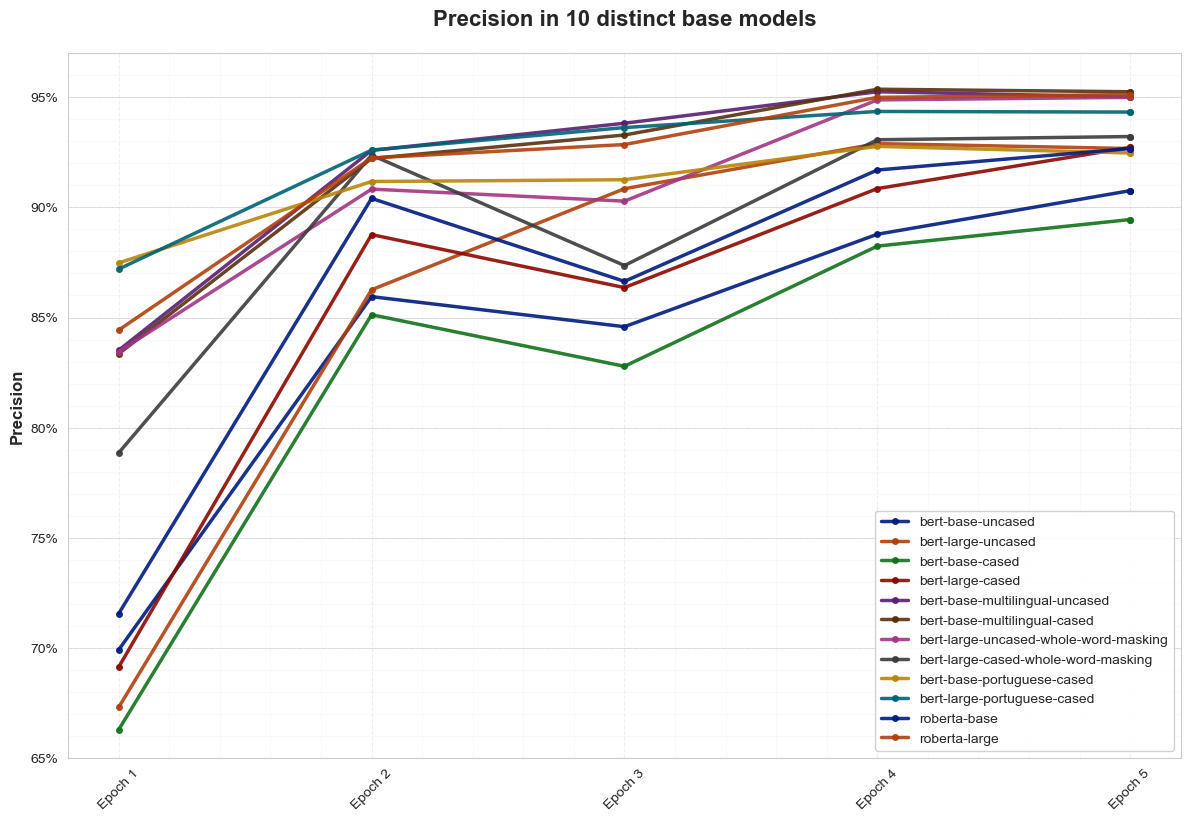

In [90]:
# Create the line plot with seaborn styling
plt.style.use('default')  # Reset any previous styles
sns.set_style("whitegrid")
sns.set_palette("dark")  # Use a nice color palette

plt.figure(figsize=(12, 8))

# Get unique output directories and create custom labels
unique_dirs = df_final['training_args_output_dir'].unique()

# Create a mapping for cleaner legend labels
legend_labels = {}
for output_dir in unique_dirs:
    # Get the model name for this output directory
    model_name = df_final[df_final['training_args_output_dir'] == output_dir]['tokenizer_info_model_name'].iloc[0]
    # Clean up the model name for better display (remove path-like parts)
    clean_model_name = model_name.split('/')[-1] if '/' in model_name else model_name
    legend_labels[output_dir] = clean_model_name

# Plot a line for each output_dir
for output_dir in unique_dirs:
    # Filter data for current output_dir
    dir_data = df_final[df_final['training_args_output_dir'] == output_dir]
    
    # Sort by epoch to ensure proper line connection
    dir_data = dir_data.sort_values('epoch_epoch')
    
    # Plot the line with seaborn-compatible styling
    plt.plot(dir_data['epoch_epoch'], dir_data['epoch_eval_precision'], 
             marker='o', linewidth=2.5, markersize=4, 
             label=legend_labels[output_dir], alpha=0.9)

# Customize the plot with cleaner styling
#plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision in 10 distinct base models', fontsize=16, fontweight='bold', pad=20)

# Position legend in lower right and improve styling
plt.legend(loc='lower right', frameon=True, fancybox=True, 
           framealpha=0.9, facecolor='white')

# Improve grid and overall appearance
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Set better axis limits and ticks
plt.xticks(ticks=range(1, 6), labels=[f'Epoch {i}' for i in range(1, 6)], rotation=45)
plt.yticks(ticks=[i/20 for i in range(12, 20)], labels=[f"{i*5}%" for i in range(12, 20)])
plt.xlim(left=0.8)
plt.ylim(bottom=0.65, top=0.97)  # Adjusted to focus on precision range

# Add light horizontal lines for each ytick
for i in range(12, 20):
    plt.axhline(y=i/20, color='gray', linestyle='-', alpha=0.3, linewidth=0.5, zorder=0)


# Add minor ticks for better readability
plt.minorticks_on()
plt.grid(which='minor', alpha=0.1)

# Save as PDF for LaTeX
plt.savefig('../data/results_visualization/exp_1-10_precision_plot.pdf', 
            format='pdf', dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()

In [106]:
df_opt_exp = df_final[60:]  # Keep only the parameter optimization experiments
df_opt_exp = df_opt_exp.reset_index(drop=True)

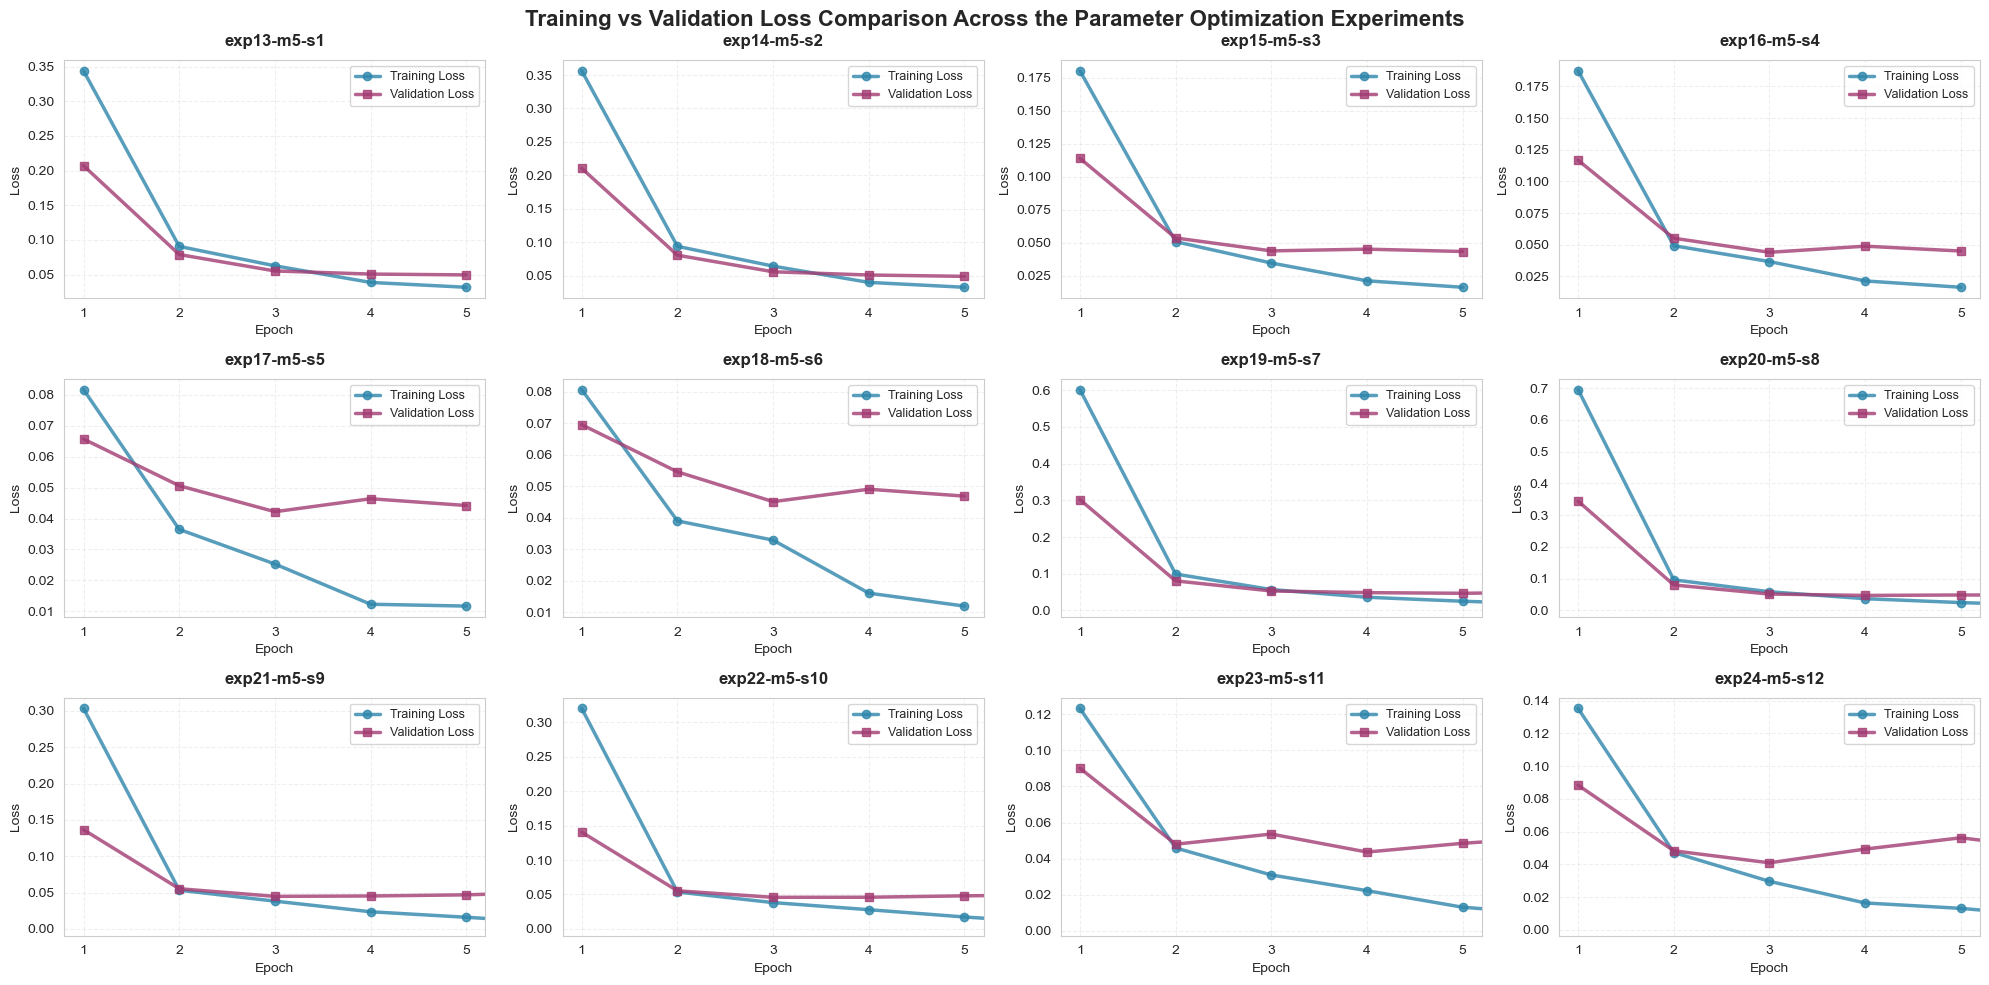

In [120]:
# Create a comprehensive loss comparison plot
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("tab10")

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

# Get unique output directories
unique_dirs = df_opt_exp['training_args_output_dir'].unique()

for idx, output_dir in enumerate(unique_dirs):
    # Filter data for current output_dir
    dir_data = df_opt_exp[df_opt_exp['training_args_output_dir'] == output_dir]
    dir_data = dir_data.sort_values('epoch_epoch')
    
    # Get model name for title
    model_name = dir_data['training_args_output_dir'].iloc[0]
    # Plot training loss and evaluation loss
    axes[idx].plot(dir_data['epoch_epoch'], dir_data['epoch_loss'], 
                   marker='o', linewidth=2.5, markersize=6, 
                   label='Training Loss', color='#2E86AB', alpha=0.8)
    
    axes[idx].plot(dir_data['epoch_epoch'], dir_data['epoch_eval_loss'], 
                   marker='s', linewidth=2.5, markersize=6, 
                   label='Validation Loss', color='#A23B72', alpha=0.8)
    
    # Customize each subplot
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_xlabel('Epoch', fontsize=10)
    axes[idx].set_ylabel('Loss', fontsize=10)
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    axes[idx].legend(loc='upper right', fontsize=9)
    
    # Set consistent x-axis
    axes[idx].set_xlim(0.8, 5.2)
    axes[idx].set_xticks(range(1, 6))

# Adjust layout and add main title
plt.suptitle('Training vs Validation Loss Comparison Across the Parameter Optimization Experiments', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Save the plot
plt.savefig('../data/results_visualization/exp_1-10_loss_comparison_subplots.pdf', 
            format='pdf', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

In [91]:
df_for_table = df_final[df_final['epoch_epoch'] == 5].sort_values('training_args_output_dir', ascending=True)[[
        'training_args_output_dir',
        'tokenizer_info_model_name',
        'epoch_epoch',
        'epoch_eval_loss',
        'epoch_eval_precision',
        'epoch_eval_recall',
        'epoch_eval_f1',
        'epoch_eval_accuracy',]]

In [92]:
df_for_table

,training_args_output_dir,tokenizer_info_model_name,epoch_epoch,epoch_eval_loss,epoch_eval_precision,epoch_eval_recall,epoch_eval_f1,epoch_eval_accuracy
4,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262
5,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,NaN,NaN,NaN,NaN,NaN
6,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262
7,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262
12,exp02,bert-large-uncased,5.0,0.063467,0.926750,0.956140,0.941216,0.989191
13,exp02,bert-large-uncased,5.0,NaN,NaN,NaN,NaN,NaN
14,exp02,bert-large-uncased,5.0,0.063467,0.926750,0.956140,0.941216,0.989191
21,exp03,bert-base-cased,5.0,0.070197,0.894498,0.932524,0.913115,0.984733
20,exp03,bert-base-cased,5.0,NaN,NaN,NaN,NaN,NaN
19,exp03,bert-base-cased,5.0,0.070197,0.894498,0.932524,0.913115,0.984733


In [93]:
df_for_table['mean_eval_performance'] = df_for_table[['epoch_eval_precision', 'epoch_eval_recall', 'epoch_eval_f1', 'epoch_eval_accuracy']].mean(axis=1)

In [94]:
df_for_table

,training_args_output_dir,tokenizer_info_model_name,epoch_epoch,epoch_eval_loss,epoch_eval_precision,epoch_eval_recall,epoch_eval_f1,epoch_eval_accuracy,mean_eval_performance
4,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262,0.939829
5,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262,0.939829
7,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,5.0,0.069732,0.907612,0.941296,0.924147,0.986262,0.939829
12,exp02,bert-large-uncased,5.0,0.063467,0.926750,0.956140,0.941216,0.989191,0.953324
13,exp02,bert-large-uncased,5.0,NaN,NaN,NaN,NaN,NaN,NaN
14,exp02,bert-large-uncased,5.0,0.063467,0.926750,0.956140,0.941216,0.989191,0.953324
21,exp03,bert-base-cased,5.0,0.070197,0.894498,0.932524,0.913115,0.984733,0.931218
20,exp03,bert-base-cased,5.0,NaN,NaN,NaN,NaN,NaN,NaN
19,exp03,bert-base-cased,5.0,0.070197,0.894498,0.932524,0.913115,0.984733,0.931218
